In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

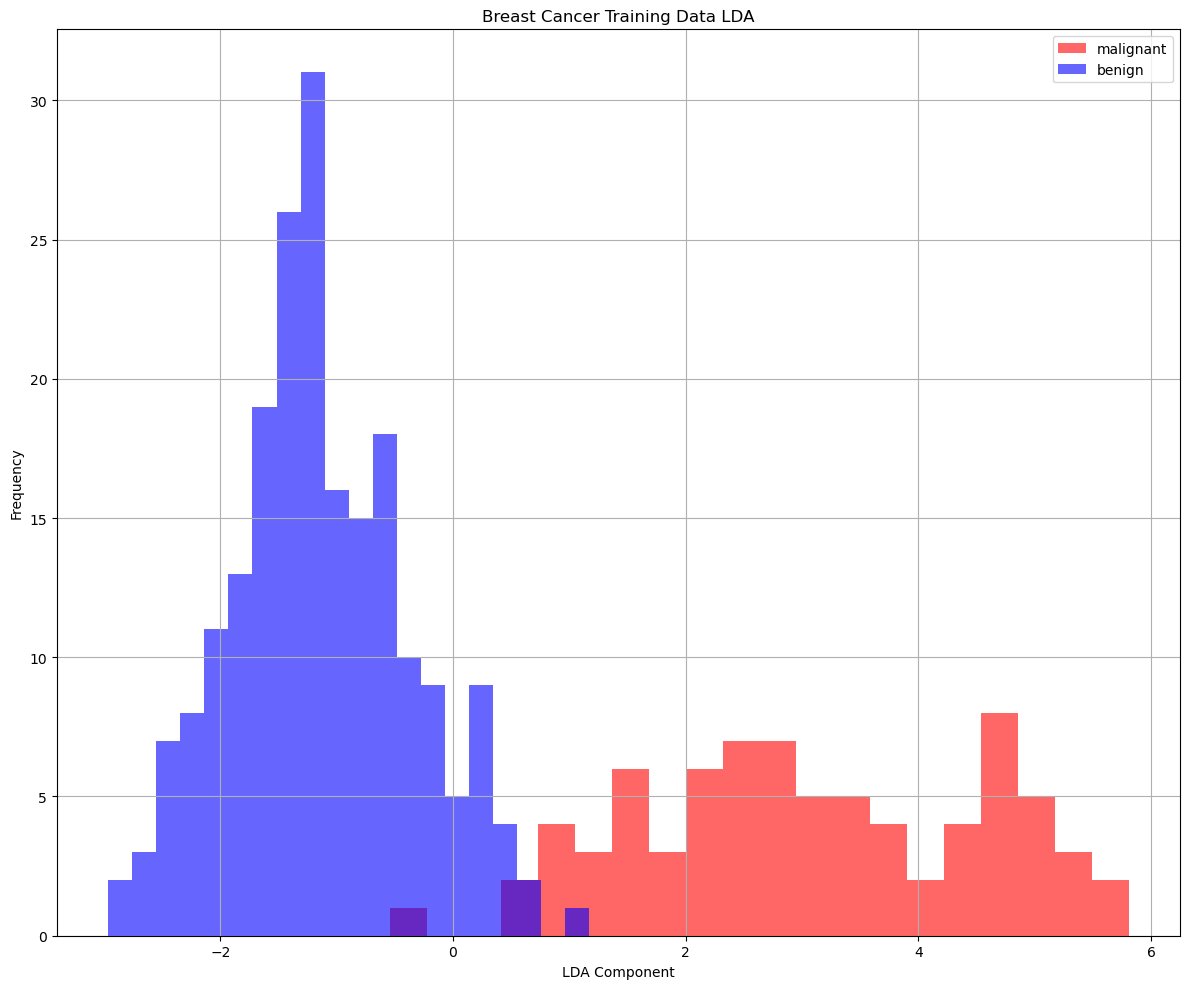

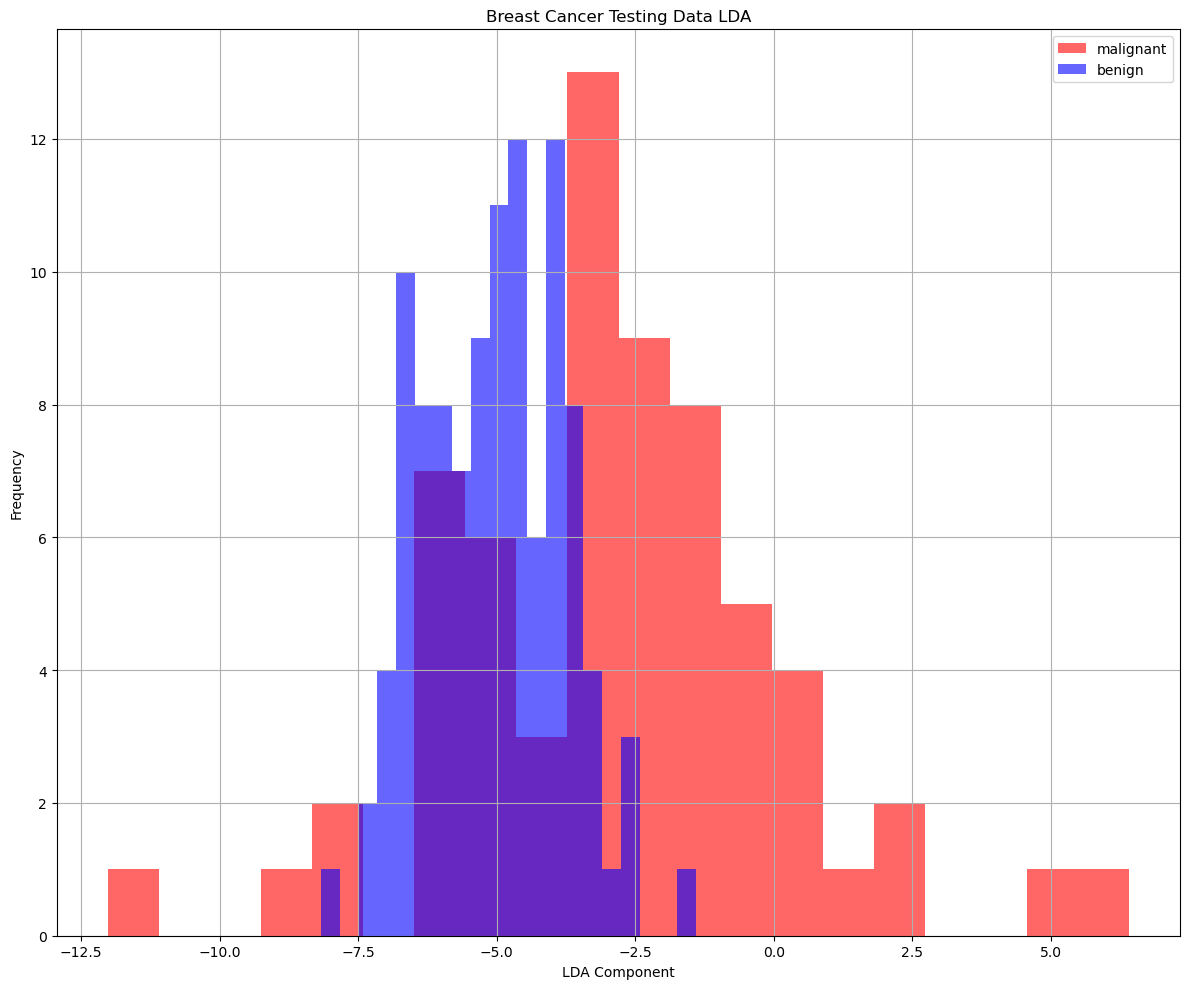

[I 2025-04-27 04:24:04,028] A new study created in memory with name: no-name-4a39ece2-a738-4748-afc6-c24daeda01cc
[I 2025-04-27 04:24:16,441] Trial 0 finished with value: 0.9790683605565638 and parameters: {'n_estimators': 9750, 'learning_rate': 0.005745054006312207, 'num_leaves': 10, 'max_depth': 9, 'min_child_samples': 39, 'subsample': 0.9773541064728263, 'colsample_bytree': 0.8776369951721814, 'reg_alpha': 2.6470002375488917e-07, 'reg_lambda': 0.004649978358762013}. Best is trial 0 with value: 0.9790683605565638.
[I 2025-04-27 04:24:21,967] Trial 1 finished with value: 0.9860254083484573 and parameters: {'n_estimators': 5244, 'learning_rate': 0.018477015338250212, 'num_leaves': 57, 'max_depth': 5, 'min_child_samples': 73, 'subsample': 0.7425555822890928, 'colsample_bytree': 0.5266265245426719, 'reg_alpha': 9.702472342980828e-07, 'reg_lambda': 1.1036357192751194}. Best is trial 1 with value: 0.9860254083484573.
[I 2025-04-27 04:24:24,433] Trial 2 finished with value: 0.98608590441621

Best trial:
Accuracy: 0.9895946763460376
Best hyperparameters:  {'n_estimators': 5436, 'learning_rate': 0.007572687144108034, 'num_leaves': 24, 'max_depth': 10, 'min_child_samples': 77, 'subsample': 0.8493107716943984, 'colsample_bytree': 0.6614707407078048, 'reg_alpha': 5.1540142445272264e-05, 'reg_lambda': 2.845207782924512e-06}


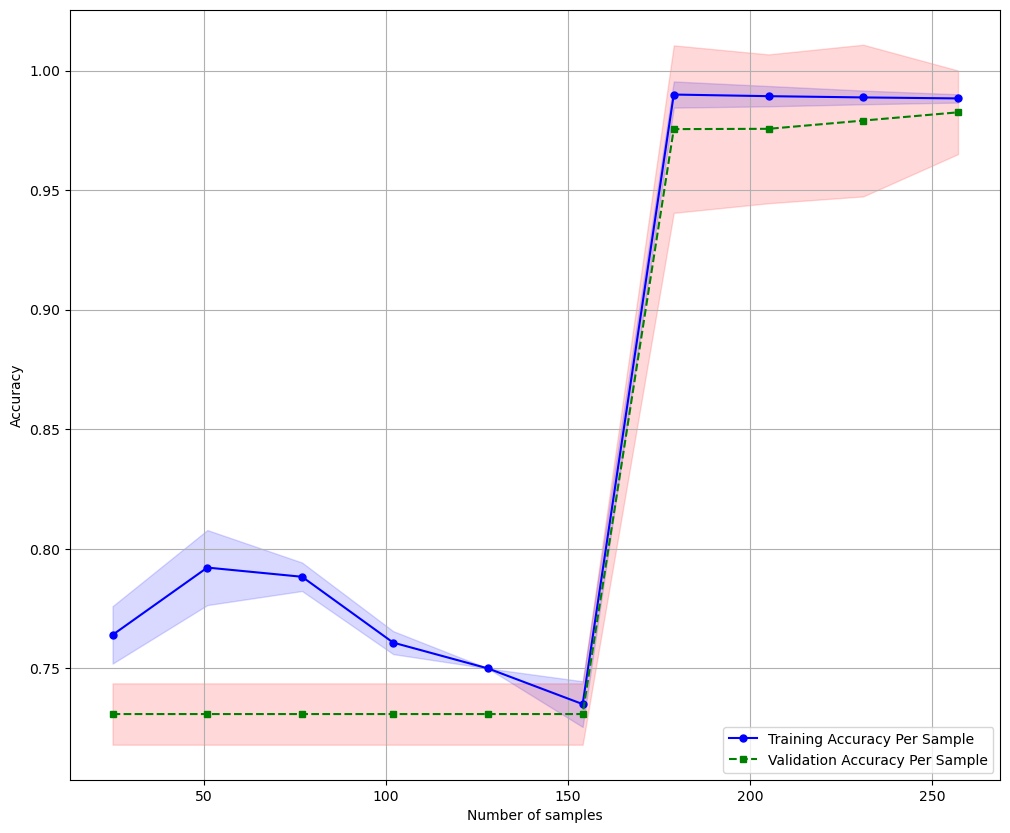

Confusion Matrix
[[  5  59]
 [  0 107]]
Accuracy: 0.6550, Precision: 0.6446, Recall: 1.0000, F1: 0.7839, AUC:0.6406


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'iqr', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'lda', {})

helper.train_and_evaluate_model('lgbm', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)